In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Text(0, 0.5, 'y')

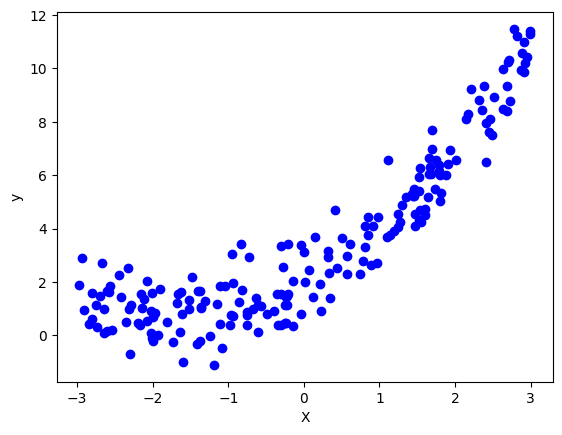

In [6]:
X=6*np.random.rand(100, 2) - 3
y=0.5*X**2 + 1.5*X+2 + np.random.randn(100, 1)
#quadratic eqution used -y=0.5*x^2 + 1.5*x + 2+outliers
plt.scatter(X,y,color='blue')
plt.xlabel('X')
plt.ylabel('y')

In [7]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train, y_train)
from sklearn.metrics import r2_score
sscore = r2_score(y_test, regression_1.predict(X_test))
print("R2 score for linear regression: ", sscore)


R2 score for linear regression:  0.6834163665281159


Text(0, 0.5, 'y dataset')

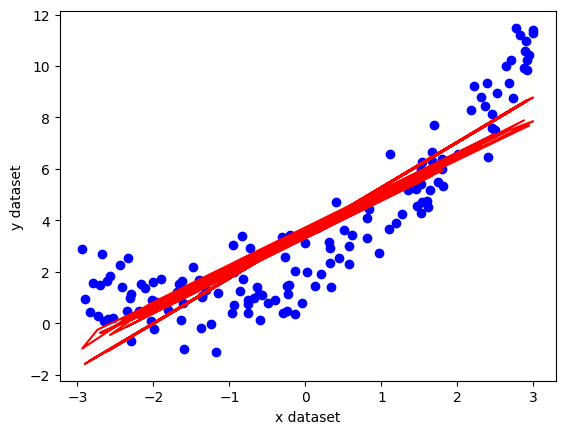

In [9]:
##visualizing  this model
plt.plot(X_train,regression_1.predict(X_train), color='red')
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('x dataset')
plt.ylabel('y dataset')


In [10]:
## Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
X_train_poly

array([[ 1.00000000e+00, -9.36285604e-01, -2.70805675e-01,
         8.76630732e-01,  2.53551455e-01,  7.33357137e-02],
       [ 1.00000000e+00, -7.54664750e-01, -1.81220825e+00,
         5.69518885e-01,  1.36760969e+00,  3.28409875e+00],
       [ 1.00000000e+00,  1.35013672e+00,  1.45932498e+00,
         1.82286916e+00,  1.97028824e+00,  2.12962939e+00],
       [ 1.00000000e+00,  1.27004714e+00,  2.00590534e+00,
         1.61301975e+00,  2.54759435e+00,  4.02365622e+00],
       [ 1.00000000e+00,  1.51947732e+00,  2.52030894e+00,
         2.30881134e+00,  3.82955227e+00,  6.35195713e+00],
       [ 1.00000000e+00, -9.72267696e-01,  1.64417007e+00,
         9.45304474e-01, -1.59857345e+00,  2.70329523e+00],
       [ 1.00000000e+00,  2.99576604e+00,  6.11033328e-01,
         8.97461419e+00,  1.83051290e+00,  3.73361727e-01],
       [ 1.00000000e+00,  2.68038885e+00, -7.55125725e-01,
         7.18448438e+00, -2.02403057e+00,  5.70214861e-01],
       [ 1.00000000e+00,  1.69628830e+00, -2.085

In [12]:
from sklearn.metrics import r2_score
regression= LinearRegression()
regression.fit(X_train_poly, y_train)
sscore = r2_score(y_test, regression.predict(X_test_poly))  
print("R2 score for polynomial regression: ", sscore)

R2 score for polynomial regression:  0.920435402899856


In [13]:
regression.coef_

array([[ 0.        ,  1.51321121,  0.03044599,  0.46171658, -0.0125627 ,
        -0.03409204],
       [ 0.        ,  0.01321121,  1.53044599, -0.03828342, -0.0125627 ,
         0.46590796]])

Text(0, 0.5, 'y dataset')

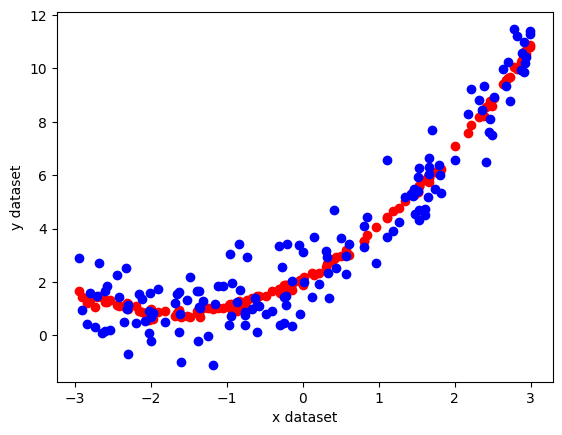

In [14]:
plt.scatter(X_train,regression.predict(X_train_poly), color='red')
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('x dataset')
plt.ylabel('y dataset')

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

In [17]:
poly_regression(6)

ValueError: X has 1 features, but PolynomialFeatures is expecting 2 features as input.

ValueError: x and y must be the same size

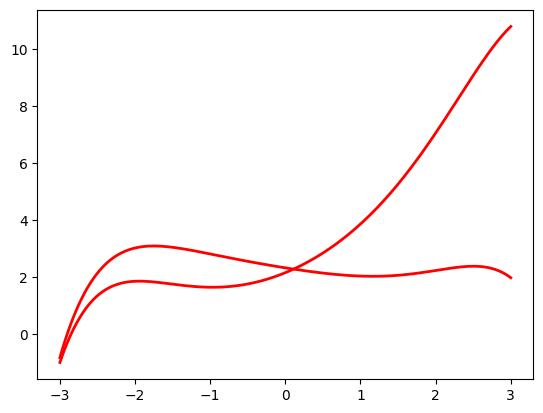

In [19]:
poly_regression(6)